# Import Library

In [1]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [2]:
import torch
torch.autograd.set_detect_anomaly(True)

print('pytorch version', torch.__version__)
print("GPU available:", torch.cuda.device_count())
#print('GPU name:',torch.cuda.get_device_name(0))

# Set the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pytorch version 2.5.1+cu124
GPU available: 1


In [3]:
#!nvcc --version

In [4]:
# For data augmentation
from torchvision import transforms, datasets

In [5]:
import transformers

# For Tokenizers
from transformers import ViTImageProcessor, ViTConfig

# For Model
from transformers import ViTModel, ViTForImageClassification

# For TPU
from transformers import set_seed
from torch.optim import AdamW

In [6]:
!pip install -q datasets #==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cu

In [7]:
# For Data Loaders
import datasets
from torch.utils.data import Dataset, DataLoader
#from torchvision.transforms import Compose, Resize, ToTensor

In [8]:
#!pip install -q accelerate==0.21.0

In [9]:
# For Display
from tqdm.notebook import tqdm

# For GPU
from accelerate import Accelerator, notebook_launcher

In [10]:
!pip install -q decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 100.7 MB/s eta 0:00:00


In [11]:
# Use PyTorch bridge for Decord
import decord

from decord.bridge import set_bridge
decord.bridge.set_bridge("torch")

from decord import VideoReader

In [12]:
#!pip install -q av

In [13]:
!pip install -q tensorboard

In [14]:
!pip install -q kaggle

In [15]:
from torch.utils.tensorboard import SummaryWriter

In [16]:
import kagglehub
import random

import cv2
from google.colab.patches import cv2_imshow

import os
import zipfile

from PIL import Image
import gc
from glob import glob
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [18]:
import torch.nn.functional as F
from torch.nn import TripletMarginWithDistanceLoss

In [19]:
## installing MediaPipe
#!pip install -q mediapipe

In [20]:
#pose_landmark_model = !wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task
#hand_landmark_model = !wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [21]:
#import mediapipe as mp
#from mediapipe.tasks import python
#from mediapipe.tasks.python import vision
#from mediapipe import solutions
#from mediapipe.framework.formats import landmark_pb2

In [22]:
#mp_drawing = mp.solutions.drawing_utils
#mp_drawing_styles = mp.solutions.drawing_styles
#mp_hands = mp.solutions.hands
#mp_face = mp.solutions.face_mesh
#mp_pose = mp.solutions.pose
#mp_holistic = mp.solutions.holistic

# Initialse Globle Variables

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
from google.colab import userdata
secret_token_hf = userdata.get('HF_TOKEN')

In [25]:
gdrive_path = '/content/drive/MyDrive/Kaggle/FaceRecognition'
local_path = '/content/FaceRecognition'

In [26]:
BATCH_SIZE = 8
print('BATCH_SIZE =',BATCH_SIZE)

BUFFER_SIZE = BATCH_SIZE * 8
print('BUFFER_SIZE =',BUFFER_SIZE)

MODEL_TRANSFORMER = 'google/vit-base-patch16-224'

EMBEDDING_SIZE = 512
print('CLIP_LENGTH =',EMBEDDING_SIZE)

CLIP_SIZE = 224
print('Image Dimension =', CLIP_SIZE,'X', CLIP_SIZE)

BATCH_SIZE = 8
BUFFER_SIZE = 64
CLIP_LENGTH = 512
Image Dimension = 224 X 224


In [27]:
#import os
#os.environ["CUDA_MODULE_LOADING"] = "LAZY"

In [28]:
def seed_everything(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [29]:
seed_everything(42)

# Import Data

In [30]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle/.kaggle'

In [31]:
!kaggle datasets download -d jessicali9530/lfw-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset
License(s): other
 88% 99.0M/112M [00:00<00:00, 167MB/s]
100% 112M/112M [00:00<00:00, 171MB/s] 


In [32]:
# Define the path to your zip file
file_path = '/content/lfw-dataset.zip'

In [33]:
# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/kaggle')

In [34]:
data_path = '/content/kaggle'

In [35]:
all_names_df = pd.read_csv(f'{data_path}/lfw_allnames.csv')
readme_df = pd.read_csv(f'{data_path}/lfw_readme.csv')

matchpairsTrain_df = pd.read_csv(f'{data_path}/matchpairsDevTrain.csv')
matchpairsTest_df = pd.read_csv(f'{data_path}/matchpairsDevTest.csv')

mismatchpairsTrain_df = pd.read_csv(f'{data_path}/mismatchpairsDevTrain.csv')
mismatchpairsTest_df = pd.read_csv(f'{data_path}/mismatchpairsDevTest.csv')


pairs_df = pd.read_csv(f'{data_path}/pairs.csv')
people_df = pd.read_csv(f'{data_path}/lfw_allnames.csv')

##DF1 - all_names_df

In [36]:
all_names_df.head(2)

,name,images
0,AJ_Cook,1
1,AJ_Lamas,1


In [37]:
len(all_names_df)

5749

## DF2 - matchpairsTrain_df

In [38]:
matchpairsTrain_df.head(2)

,name,imagenum1,imagenum2
0,Aaron_Peirsol,1,2
1,Aaron_Peirsol,3,4


In [39]:
matchpairsTrain_df[matchpairsTrain_df['name']=='Aaron_Peirsol']

,name,imagenum1,imagenum2
0,Aaron_Peirsol,1,2
1,Aaron_Peirsol,3,4


In [40]:
len(matchpairsTrain_df)

1100

## DF3 - mismatchpairsTrain_df

In [41]:
mismatchpairsTrain_df.head(2)

,name,imagenum1,name.1,imagenum2
0,AJ_Cook,1,Marsha_Thomason,1
1,Aaron_Sorkin,2,Frank_Solich,5


In [42]:
len(mismatchpairsTrain_df)

1100

## DF4 - pairs_df

In [43]:
pairs_df.head(2)

,name,imagenum1,imagenum2,Unnamed: 3
0,Abel_Pacheco,1,4,NaN
1,Akhmed_Zakayev,1,3,NaN


In [44]:
pairs_df[pairs_df['name']=='Aaron_Peirsol']

,name,imagenum1,imagenum2,Unnamed: 3
3000,Aaron_Peirsol,1,4,NaN
3001,Aaron_Peirsol,3,4,NaN


In [45]:
pairs_df[pairs_df['Unnamed: 3'].isnull()==False]

,name,imagenum1,imagenum2,Unnamed: 3
300,Abdel_Madi_Shabneh,1,Dean_Barker,1.0
301,Abdel_Madi_Shabneh,1,Giancarlo_Fisichella,1.0
302,Abdel_Madi_Shabneh,1,Mikhail_Gorbachev,1.0
303,Abdul_Rahman,1,Portia_de_Rossi,1.0
304,Abel_Pacheco,1,Jong_Thae_Hwa,2.0
...,...,...,...,...
5995,Scott_Wolf,2,Troy_Polamalu,1.0
5996,Sergei_Alexandrovitch_Ordzhonikidze,1,Yolanda_King,1.0
5997,Shane_Loux,1,Val_Ackerman,1.0
5998,Shawn_Marion,1,Shirley_Jones,1.0


In [46]:
matched_pairs = pairs_df[pairs_df['Unnamed: 3'].isnull()==True].copy()
mismatched_pairs = pairs_df[pairs_df['Unnamed: 3'].isnull()==False].copy()

In [47]:
matched_pairs.head(3)

,name,imagenum1,imagenum2,Unnamed: 3
0,Abel_Pacheco,1,4,NaN
1,Akhmed_Zakayev,1,3,NaN
2,Akhmed_Zakayev,2,3,NaN


In [48]:
matched_pairs.drop(labels='Unnamed: 3', axis=1, inplace=True)

In [49]:
len(matched_pairs)

3000

In [50]:
matched_pairs.head(3)

,name,imagenum1,imagenum2
0,Abel_Pacheco,1,4
1,Akhmed_Zakayev,1,3
2,Akhmed_Zakayev,2,3


In [51]:
mismatched_pairs.head(3)

,name,imagenum1,imagenum2,Unnamed: 3
300,Abdel_Madi_Shabneh,1,Dean_Barker,1.0
301,Abdel_Madi_Shabneh,1,Giancarlo_Fisichella,1.0
302,Abdel_Madi_Shabneh,1,Mikhail_Gorbachev,1.0


In [52]:
len(mismatched_pairs)

3000

In [53]:
mismatched_pairs.rename(columns={'imagenum2':'name2','Unnamed: 3':'imagenum2'}, inplace=True)

In [54]:
mismatched_pairs.head(3)

,name,imagenum1,name2,imagenum2
300,Abdel_Madi_Shabneh,1,Dean_Barker,1.0
301,Abdel_Madi_Shabneh,1,Giancarlo_Fisichella,1.0
302,Abdel_Madi_Shabneh,1,Mikhail_Gorbachev,1.0


##DF5 - people_df

In [55]:
people_df.head(2)

,name,images
0,AJ_Cook,1
1,AJ_Lamas,1


## Creating Id and Labels

In [56]:
image_path = f'{data_path}/lfw-deepfunneled/lfw-deepfunneled'

In [57]:
names = sorted(os.listdir(image_path))
print(names)

['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agn

In [58]:
label_to_idx = {}
idx_to_label = {}

for idx, label in enumerate(names):
  class_folder = os.path.join(local_path, label)
  if os.path.exists(image_path):
    label_to_idx[label] = idx
    idx_to_label[idx] = label

In [59]:
print(label_to_idx)

{'AJ_Cook': 0, 'AJ_Lamas': 1, 'Aaron_Eckhart': 2, 'Aaron_Guiel': 3, 'Aaron_Patterson': 4, 'Aaron_Peirsol': 5, 'Aaron_Pena': 6, 'Aaron_Sorkin': 7, 'Aaron_Tippin': 8, 'Abba_Eban': 9, 'Abbas_Kiarostami': 10, 'Abdel_Aziz_Al-Hakim': 11, 'Abdel_Madi_Shabneh': 12, 'Abdel_Nasser_Assidi': 13, 'Abdoulaye_Wade': 14, 'Abdul_Majeed_Shobokshi': 15, 'Abdul_Rahman': 16, 'Abdulaziz_Kamilov': 17, 'Abdullah': 18, 'Abdullah_Ahmad_Badawi': 19, 'Abdullah_Gul': 20, 'Abdullah_Nasseef': 21, 'Abdullah_al-Attiyah': 22, 'Abdullatif_Sener': 23, 'Abel_Aguilar': 24, 'Abel_Pacheco': 25, 'Abid_Hamid_Mahmud_Al-Tikriti': 26, 'Abner_Martinez': 27, 'Abraham_Foxman': 28, 'Aby_Har-Even': 29, 'Adam_Ant': 30, 'Adam_Freier': 31, 'Adam_Herbert': 32, 'Adam_Kennedy': 33, 'Adam_Mair': 34, 'Adam_Rich': 35, 'Adam_Sandler': 36, 'Adam_Scott': 37, 'Adel_Al-Jubeir': 38, 'Adelina_Avila': 39, 'Adisai_Bodharamik': 40, 'Adolfo_Aguilar_Zinser': 41, 'Adolfo_Rodriguez_Saa': 42, 'Adoor_Gopalakarishnan': 43, 'Adrian_Annus': 44, 'Adrian_Fernandez

In [60]:
print(idx_to_label)

{0: 'AJ_Cook', 1: 'AJ_Lamas', 2: 'Aaron_Eckhart', 3: 'Aaron_Guiel', 4: 'Aaron_Patterson', 5: 'Aaron_Peirsol', 6: 'Aaron_Pena', 7: 'Aaron_Sorkin', 8: 'Aaron_Tippin', 9: 'Abba_Eban', 10: 'Abbas_Kiarostami', 11: 'Abdel_Aziz_Al-Hakim', 12: 'Abdel_Madi_Shabneh', 13: 'Abdel_Nasser_Assidi', 14: 'Abdoulaye_Wade', 15: 'Abdul_Majeed_Shobokshi', 16: 'Abdul_Rahman', 17: 'Abdulaziz_Kamilov', 18: 'Abdullah', 19: 'Abdullah_Ahmad_Badawi', 20: 'Abdullah_Gul', 21: 'Abdullah_Nasseef', 22: 'Abdullah_al-Attiyah', 23: 'Abdullatif_Sener', 24: 'Abel_Aguilar', 25: 'Abel_Pacheco', 26: 'Abid_Hamid_Mahmud_Al-Tikriti', 27: 'Abner_Martinez', 28: 'Abraham_Foxman', 29: 'Aby_Har-Even', 30: 'Adam_Ant', 31: 'Adam_Freier', 32: 'Adam_Herbert', 33: 'Adam_Kennedy', 34: 'Adam_Mair', 35: 'Adam_Rich', 36: 'Adam_Sandler', 37: 'Adam_Scott', 38: 'Adel_Al-Jubeir', 39: 'Adelina_Avila', 40: 'Adisai_Bodharamik', 41: 'Adolfo_Aguilar_Zinser', 42: 'Adolfo_Rodriguez_Saa', 43: 'Adoor_Gopalakarishnan', 44: 'Adrian_Annus', 45: 'Adrian_Ferna

In [61]:
# Collect all video files
image_paths = []
labels_int = []
labels_text = []
for idx, label in enumerate(names):
  class_folder = os.path.join(image_path, label)
  #print(class_folder)
  image_file = glob(os.path.join(class_folder, '*.jpg'))
  #print(image_file)
  image_paths.extend(image_file)
  labels_int.extend([idx] * len(image_file))
  labels_text.extend([label] * len(image_file))

In [62]:
print('input path size:', len(image_paths))
print(image_paths)

input path size: 13233
['/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/AJ_Lamas/AJ_Lamas_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Guiel/Aaron_Guiel_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Patterson/Aaron_Patterson_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0002.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0004.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0003.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg', '/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0001.jpg', '/content/kaggle

In [63]:
print('labels size:', len(labels_int))
print(labels_int)

labels size: 13233
[0, 1, 2, 3, 4, 5, 5, 5, 5, 6, 7, 7, 8, 9, 10, 11, 12, 13, 13, 14, 14, 14, 14, 15, 16, 17, 18, 18, 18, 18, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 22, 22, 22, 23, 23, 24, 25, 25, 25, 25, 26, 26, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 36, 36, 36, 37, 37, 38, 38, 38, 39, 40, 41, 41, 41, 42, 42, 43, 44, 45, 46, 46, 47, 48, 48, 49, 50, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 54, 55, 56, 57, 58, 58, 59, 60, 60, 60, 60, 60, 61, 62, 63, 64, 65, 66, 66, 67, 67, 67, 67, 67, 68, 68, 68, 69, 70, 71, 72, 73, 74, 74, 75, 76, 77, 78, 78, 78, 79, 79, 79, 80, 81, 82, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 85, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 88, 89, 90, 90, 91, 92, 93, 93, 93, 93, 93, 94, 95, 96, 96, 97, 98, 99, 100, 101, 102, 103, 103, 103, 103, 103, 104, 105, 106, 107, 107, 107, 107, 107, 107, 108, 109, 110, 111, 112, 112, 113, 114, 114, 115, 116, 116, 117, 117, 118, 118, 118, 118, 119, 120, 120, 121, 121, 12

In [64]:
print('labels size:', len(labels_text))
print(labels_text)

labels size: 13233
['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah', 'Abdullah', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullah_al-Attiyah', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abdullatif_Sener', 'Abel_Aguil

## Testing the dataframes

In [65]:
matchpairsTrain_df[matchpairsTrain_df['name']=='Aaron_Peirsol']

,name,imagenum1,imagenum2
0,Aaron_Peirsol,1,2
1,Aaron_Peirsol,3,4


In [66]:
matched_pairs[matched_pairs['name']=='Aaron_Peirsol']

,name,imagenum1,imagenum2
3000,Aaron_Peirsol,1,4
3001,Aaron_Peirsol,3,4


In [67]:
mismatchpairsTrain_df[mismatchpairsTrain_df['name']=='Abdel_Madi_Shabneh']

,name,imagenum1,name.1,imagenum2


In [68]:
mismatched_pairs[mismatched_pairs['name']=='Abdel_Madi_Shabneh']

,name,imagenum1,name2,imagenum2
300,Abdel_Madi_Shabneh,1,Dean_Barker,1.0
301,Abdel_Madi_Shabneh,1,Giancarlo_Fisichella,1.0
302,Abdel_Madi_Shabneh,1,Mikhail_Gorbachev,1.0


In [69]:
matchpairsTrain_df.head(2)

,name,imagenum1,imagenum2
0,Aaron_Peirsol,1,2
1,Aaron_Peirsol,3,4


In [70]:
matchpairsTrain_df.loc[0,'imagenum1']

1

In [71]:
str(matchpairsTrain_df.loc[0, 'imagenum1']).rjust(4,'0')

'0001'

# Train Test Dataset

## Matched Train

In [72]:
img_1 = []
img_2 = []
for idx, val in enumerate(matchpairsTrain_df['name']):
  new_str =  matchpairsTrain_df.loc[idx,'name']+'_'+str(matchpairsTrain_df.loc[idx, 'imagenum1']).rjust(4,'0')
  new_str_path = image_path+'/'+matchpairsTrain_df.loc[idx,'name']+'/'+new_str+'.jpg'
  img_1.append(new_str_path)
  new_str =  matchpairsTrain_df.loc[idx,'name']+'_'+str(matchpairsTrain_df.loc[idx, 'imagenum2']).rjust(4,'0')
  new_str_path = image_path+'/'+matchpairsTrain_df.loc[idx,'name']+'/'+new_str+'.jpg'
  img_2.append(new_str_path)

matchpairsTrain_df['img_1'] = img_1
matchpairsTrain_df['img_2'] = img_2

In [73]:
matchpairsTrain_df.head()

,name,imagenum1,imagenum2,img_1,img_2
0,Aaron_Peirsol,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
1,Aaron_Peirsol,3,4,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
2,Aaron_Sorkin,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
3,Abdel_Nasser_Assidi,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
4,Abdullah,1,3,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...


In [74]:
matchpairsTrain_df.loc[5,'img_1']

'/content/kaggle/lfw-deepfunneled/lfw-deepfunneled/Abdullah/Abdullah_0002.jpg'

## Matched Test

In [75]:
img_1 = []
img_2 = []
for idx, val in enumerate(matchpairsTest_df['name']):
  new_str =  matchpairsTest_df.loc[idx,'name']+'_'+str(matchpairsTest_df.loc[idx, 'imagenum1']).rjust(4,'0')
  new_str_path = image_path+'/'+matchpairsTest_df.loc[idx,'name']+'/'+new_str+'.jpg'
  img_1.append(new_str_path)
  new_str =  matchpairsTest_df.loc[idx,'name']+'_'+str(matchpairsTest_df.loc[idx, 'imagenum2']).rjust(4,'0')
  new_str_path = image_path+'/'+matchpairsTest_df.loc[idx,'name']+'/'+new_str+'.jpg'
  img_2.append(new_str_path)

matchpairsTest_df['img_1'] = img_1
matchpairsTest_df['img_2'] = img_2

In [76]:
matchpairsTest_df.head()

,name,imagenum1,imagenum2,img_1,img_2
0,Abdullah_Gul,13,14,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
1,Abdullah_Gul,13,16,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
2,Abdullatif_Sener,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
3,Adel_Al-Jubeir,1,3,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
4,Al_Pacino,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...


## Mismatched Train

In [77]:
img_1 = []
img_2 = []
for idx, val in enumerate(mismatchpairsTrain_df['name']):
  new_str =  mismatchpairsTrain_df.loc[idx,'name']+'_'+str(mismatchpairsTrain_df.loc[idx, 'imagenum1']).rjust(4,'0')
  new_str_path = image_path+'/'+mismatchpairsTrain_df.loc[idx,'name']+'/'+new_str+'.jpg'
  img_1.append(new_str_path)
  new_str =  mismatchpairsTrain_df.loc[idx,'name.1']+'_'+str(mismatchpairsTrain_df.loc[idx, 'imagenum2']).rjust(4,'0')
  new_str_path = image_path+'/'+mismatchpairsTrain_df.loc[idx,'name.1']+'/'+new_str+'.jpg'
  img_2.append(new_str_path)

mismatchpairsTrain_df['img_1'] = img_1
mismatchpairsTrain_df['img_2'] = img_2

In [78]:
mismatchpairsTrain_df.head()

,name,imagenum1,name.1,imagenum2,img_1,img_2
0,AJ_Cook,1,Marsha_Thomason,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
1,Aaron_Sorkin,2,Frank_Solich,5,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
3,Abdoulaye_Wade,4,Linda_Dano,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
4,Abdul_Rahman,1,Magui_Serna,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...


## Mismatched Test

In [79]:
img_1 = []
img_2 = []
for idx, val in enumerate(mismatchpairsTest_df['name']):
  new_str =  mismatchpairsTest_df.loc[idx,'name']+'_'+str(mismatchpairsTest_df.loc[idx, 'imagenum1']).rjust(4,'0')
  new_str_path = image_path+'/'+mismatchpairsTest_df.loc[idx,'name']+'/'+new_str+'.jpg'
  img_1.append(new_str_path)
  new_str =  mismatchpairsTest_df.loc[idx,'name.1']+'_'+str(mismatchpairsTest_df.loc[idx, 'imagenum2']).rjust(4,'0')
  new_str_path = image_path+'/'+mismatchpairsTest_df.loc[idx,'name.1']+'/'+new_str+'.jpg'
  img_2.append(new_str_path)

mismatchpairsTest_df['img_1'] = img_1
mismatchpairsTest_df['img_2'] = img_2

In [80]:
mismatchpairsTest_df.head()

,name,imagenum1,name.1,imagenum2,img_1,img_2
0,AJ_Lamas,1,Zach_Safrin,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
1,Aaron_Guiel,1,Reese_Witherspoon,3,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
2,Aaron_Tippin,1,Jose_Luis_Rodriguez_Zapatero,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
3,Abdul_Majeed_Shobokshi,1,Charles_Cope,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
4,Abdullah_Gul,16,Steve_Cox,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...


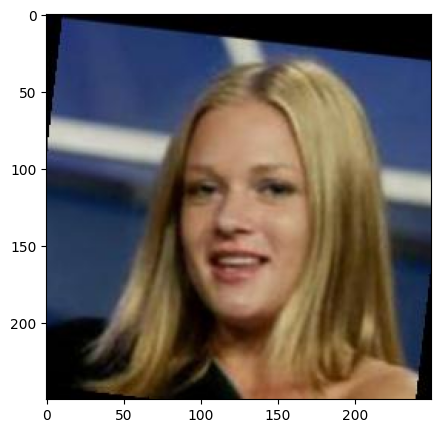

In [81]:
img = Image.open(f'{image_path}/AJ_Cook/AJ_Cook_0001.jpg')
plt.imshow(img)

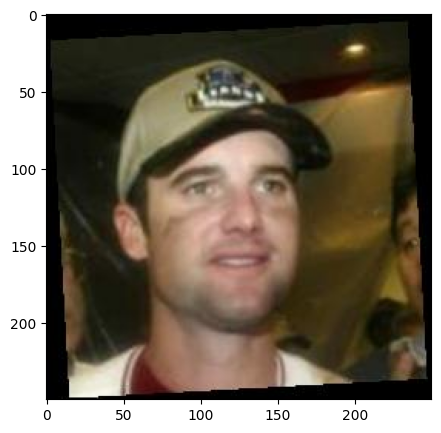

In [82]:
img = Image.open(mismatchpairsTest_df.loc[6,'img_1'])
plt.imshow(img)

## Creating complete DF

In [83]:
matchpairsTrain_df['labels'] = np.zeros(len(matchpairsTrain_df))
matchpairsTest_df['labels'] = np.zeros(len(matchpairsTest_df))

In [84]:
matchpairsTrain_df.head(3)

,name,imagenum1,imagenum2,img_1,img_2,labels
0,Aaron_Peirsol,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
1,Aaron_Peirsol,3,4,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
2,Aaron_Sorkin,1,2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0


In [85]:
mismatchpairsTrain_df['labels'] = [1] * len(mismatchpairsTrain_df)
mismatchpairsTest_df['labels'] = [1] * len(mismatchpairsTest_df)

In [86]:
mismatchpairsTrain_df.head(3)

,name,imagenum1,name.1,imagenum2,img_1,img_2,labels
0,AJ_Cook,1,Marsha_Thomason,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1
1,Aaron_Sorkin,2,Frank_Solich,5,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1


In [87]:
train_df = pd.concat([matchpairsTrain_df[['img_1','img_2','labels']].copy(), mismatchpairsTrain_df[['img_1','img_2','labels']].copy()], verify_integrity=True, ignore_index=True)
test_df = pd.concat([matchpairsTest_df[['img_1','img_2','labels']].copy(), mismatchpairsTest_df[['img_1','img_2','labels']].copy()], verify_integrity=True, ignore_index=True)

In [88]:
train_df

,img_1,img_2,labels
0,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
3,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
4,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
...,...,...,...
2195,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0
2196,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0
2197,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0
2198,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0


In [89]:
test_df

,img_1,img_2,labels
0,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
3,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
4,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,0.0
...,...,...,...
995,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0
996,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0
997,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0
998,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,1.0


## Create triplets - Train Dataset

In [90]:
# Create a dictionary of identities
identity_groups = {}

for _, row in train_df.iterrows():
    img1, img2, label = row["img_1"], row["img_2"], row["labels"]

    if label == 0:  # Same person
        if img1 not in identity_groups:
            identity_groups[img1] = set()
        if img2 not in identity_groups:
            identity_groups[img2] = set()

        identity_groups[img1].add(img2)
        identity_groups[img2].add(img1)

In [91]:
# Convert to triplet format
triplets = []

for _, row in train_df.iterrows():
    img1, img2, label = row["img_1"], row["img_2"], row["labels"]

    if label == 0:  # Found a positive pair
        anchor = img1
        positive = img2

        # Find a negative sample (a different person)
        negative = None
        all_images = set(train_df["img_1"]).union(set(train_df["img_2"]))
        possible_negatives = all_images - identity_groups.get(anchor, set())

        if possible_negatives:
            negative = random.choice(list(possible_negatives))
            triplets.append([anchor, positive, negative])

# Convert triplets to a DataFrame
train_triplet_df = pd.DataFrame(triplets, columns=["Anchor", "Positive", "Negative"])

In [92]:
train_triplet_df.head(3)

,Anchor,Positive,Negative
0,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...


In [93]:
len(train_triplet_df)

1100

## Create triplets - Test Dataset


In [94]:
# Create a dictionary of identities
identity_groups = {}

for _, row in test_df.iterrows():
    img1, img2, label = row["img_1"], row["img_2"], row["labels"]

    if label == 0:  # Same person
        if img1 not in identity_groups:
            identity_groups[img1] = set()
        if img2 not in identity_groups:
            identity_groups[img2] = set()

        identity_groups[img1].add(img2)
        identity_groups[img2].add(img1)

In [95]:
# Convert to triplet format
triplets = []

for _, row in test_df.iterrows():
    img1, img2, label = row["img_1"], row["img_2"], row["labels"]

    if label == 0:  # Found a positive pair
        anchor = img1
        positive = img2

        # Find a negative sample (a different person)
        negative = None
        all_images = set(test_df["img_1"]).union(set(test_df["img_2"]))
        possible_negatives = all_images - identity_groups.get(anchor, set())

        if possible_negatives:
            negative = random.choice(list(possible_negatives))
            triplets.append([anchor, positive, negative])

# Convert triplets to a DataFrame
test_triplet_df = pd.DataFrame(triplets, columns=["Anchor", "Positive", "Negative"])

In [96]:
test_triplet_df.head(3)

,Anchor,Positive,Negative
0,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
1,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...
2,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...,/content/kaggle/lfw-deepfunneled/lfw-deepfunne...


In [97]:
len(test_triplet_df)

500

# Create Dataset

In [98]:
#torch.cuda.empty_cache()

In [99]:
image_processor = ViTImageProcessor.from_pretrained(MODEL_TRANSFORMER, attn_implementation="sdpa", torch_dtype=torch.float16)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [100]:
class CustomDataset(Dataset):
    def __init__(self, anchor, positive, negative):
        self.anchor = anchor.to('cpu')
        self.positive = positive.to('cpu')
        self.negative = negative.to('cpu')

    def __len__(self):
        return len(self.anchor)

    def __getitem__(self, idx):
        item = {
            'anchor': self.anchor[idx],
            'positive': self.positive[idx],
            'negative': self.negative[idx],
        }
        return item

In [101]:
class CreateDataset():
    def __init__(self, image_processor):
        super().__init__()
        self.image_processor = image_processor
        # Define a transformation pipeline
        self.transform_train = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    transforms.v2.RandomPerspective(),
                                    transforms.v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.05),
                                    transforms.v2.ToDtype(torch.uint8, scale=False)
                                ])

        self.transform_test = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    transforms.v2.ToDtype(torch.uint8, scale=False)
                                ])

    def get_pixels(self, img_paths, training):
        pixel_values = []
        for path in tqdm(img_paths):
            # Read and process Images
            img = Image.open(path)
            #video = vr.get_batch(list(range(len(vr))))
            #video = video[:self.clip_length]

            if training:
                # Data Preperation for ML model with Augmentation
                img = self.transform_train(img) #.permute(0, 3, 1, 2))
            else:
                # Data Preperation for ML Model without Augmentation
                img = self.transform_test(img)

            # Scaling the video to ML model's desired format
            img = self.image_processor(img, return_tensors='pt') #, input_data_format='channels_first')

            #print('Stage 4',video.shape)
            #pixel_values.append(torch.tensor(video['pixel_values'], dtype=torch.float32).squeeze(0))
            pixel_values.append(img['pixel_values'].squeeze(0))

            # Force garbage collection
            del img
            gc.collect()

        return pixel_values

    def create_dataset(self, anchor, positive, negative, training=True):
        anchor = torch.stack(self.get_pixels(anchor, training))
        positive = torch.stack(self.get_pixels(positive, training))
        negative = torch.stack(self.get_pixels(negative, training))

        return CustomDataset(anchor=anchor,
                             positive=positive,
                             negative=negative)

In [102]:
dataset_obj = CreateDataset(image_processor)

# Testing the custome image processing class

In [ ]:
img = Image.open(train_triplet_df.loc[1, 'Anchor'])
processed_img = image_processor(img, return_tensors='pt')

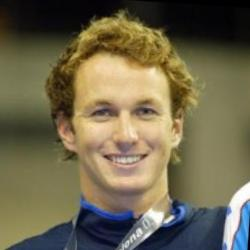

In [ ]:
img

In [ ]:
processed_img['pixel_values'].squeeze(0).shape

torch.Size([3, 224, 224])

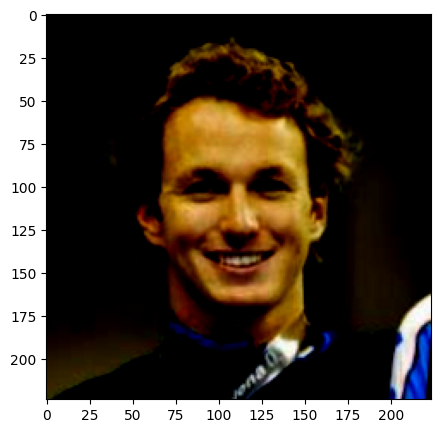

In [ ]:
plt.imshow(processed_img['pixel_values'].squeeze(0).permute(1, 2, 0))

In [ ]:
train_ds = dataset_obj.create_dataset(train_triplet_df.loc[:2, 'Anchor'], train_triplet_df.loc[:2,'Positive'], train_triplet_df.loc[:2, 'Negative'], training=True)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
del train_ds
gc.collect()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

28

In [ ]:
inputs = next(iter(train_dl))
print(inputs['anchor'].shape, inputs['positive'].shape, inputs['negative'].shape)

torch.Size([3, 3, 224, 224]) torch.Size([3, 3, 224, 224]) torch.Size([3, 3, 224, 224])


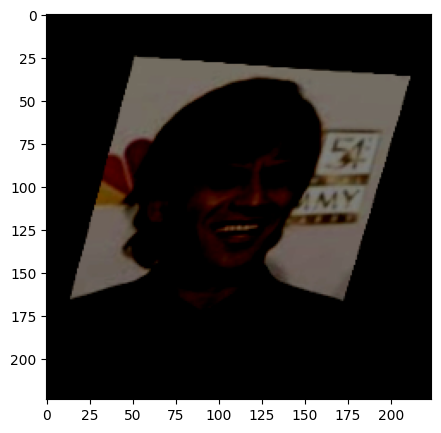

In [ ]:
plt.imshow(inputs['anchor'][1].cpu().permute(1, 2, 0))

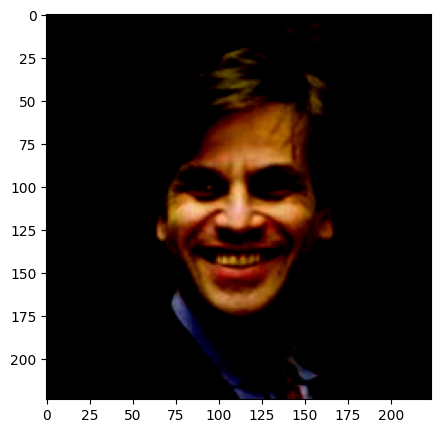

In [ ]:
plt.imshow(inputs['positive'][1].cpu().permute(1, 2, 0))

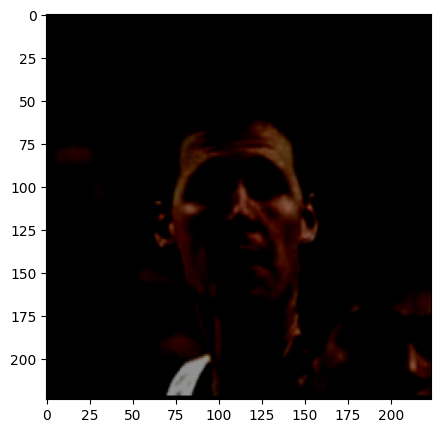

In [ ]:
plt.imshow(inputs['negative'][1].cpu().permute(1, 2, 0))

In [ ]:
print(inputs['anchor'].min())
print(inputs['anchor'].max())

tensor(-1.)
tensor(1.)


In [ ]:
print(inputs['positive'].min())
print(inputs['positive'].max())

tensor(-1.)
tensor(0.9922)


In [ ]:
print(inputs['negative'].min())
print(inputs['negative'].max())

tensor(-1.)
tensor(1.)


In [ ]:
val_ds = dataset_obj.create_dataset(test_triplet_df.loc[:2, 'Anchor'], test_triplet_df.loc[:2,'Positive'], test_triplet_df.loc[:2, 'Negative'], training=False)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
del val_ds
gc.collect()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

28

In [ ]:
# Example usage
inputs = next(iter(val_dl))
print(inputs['anchor'].shape, inputs['positive'].shape, inputs['negative'].shape)

torch.Size([3, 3, 224, 224]) torch.Size([3, 3, 224, 224]) torch.Size([3, 3, 224, 224])


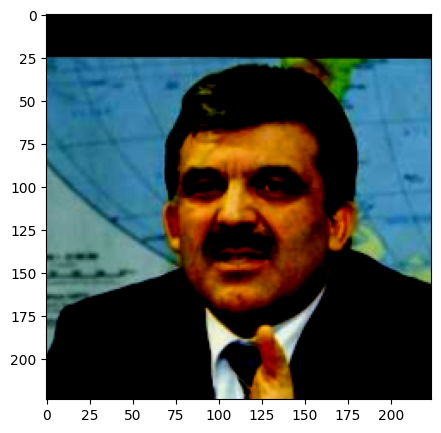

In [ ]:
plt.imshow(inputs['anchor'][1].cpu().permute(1, 2, 0))

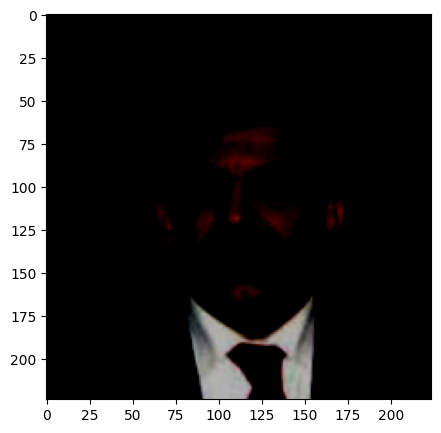

In [ ]:
plt.imshow(inputs['positive'][0].cpu().permute(1, 2, 0))

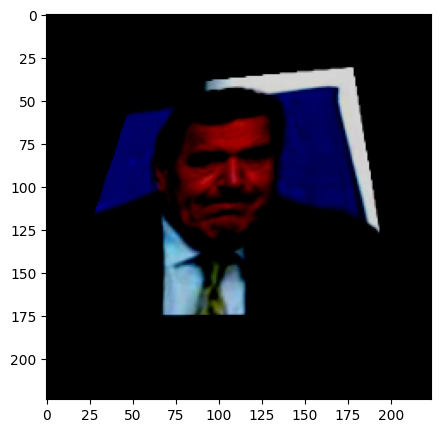

In [ ]:
plt.imshow(inputs['negative'][0].cpu().permute(1, 2, 0))

In [ ]:
print(inputs['anchor'].min())
print(inputs['anchor'].max())

tensor(-1.)
tensor(0.9608)


In [ ]:
print(inputs['positive'].min())
print(inputs['positive'].max())

tensor(-1.)
tensor(0.6941)


In [ ]:
print(inputs['negative'].min())
print(inputs['negative'].max())

tensor(-1.)
tensor(0.8980)


# Creating Daloader

In [103]:
train_ds = dataset_obj.create_dataset(train_triplet_df['Anchor'], train_triplet_df['Positive'], train_triplet_df['Negative'], training=True)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
del train_ds
gc.collect()

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

17

In [104]:
val_ds = dataset_obj.create_dataset(test_triplet_df['Anchor'], test_triplet_df['Positive'], test_triplet_df['Negative'], training=False)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
del val_ds
gc.collect()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

17

# Model Training

In [105]:
torch.cuda.empty_cache()

In [106]:
hyperparameters = {
    "learning_rate": 0.0001,
    "num_epochs": 1000, # set to very high number
    "seed": 42,
    "patience": 5, # early stopping
    "output_dir_pt": f"{gdrive_path}/vit_pytorch_GPU_2.pt",
    "output_dir_transformer": f"{gdrive_path}/vit_pytorch_transformer_GPU_2",
    'dropout_rate': 0.2,
    'num_dense_layers': 6,
    'hidden_dim': 16
}


In [107]:
# Creating NN Layer
class FaceEmbeddingModel(torch.nn.Module):
    def __init__(self, model_name, embedding_size):
        super(FaceEmbeddingModel, self).__init__()
        self.config = ViTConfig.from_pretrained(model_name, id2label=idx_to_label, label2id=label_to_idx, return_dict=True)
        self.backbone = ViTModel.from_pretrained(model_name, config=self.config)  # Load ViT model
        self.fc = torch.nn.Linear(self.backbone.config.hidden_size, embedding_size) # Convert to 512D feature vector

    def forward(self, images):
        x = self.backbone(images).last_hidden_state[:, 0]  # Extract embeddings
        x = self.fc(x)  # Convert to 512D embedding
        return torch.nn.functional.normalize(x)  # Normalize for cosine similarity

In [ ]:
class TripletLoss(torch.nn.Module):
    def __init__(self, margin=0.2):
        super(TripletLoss, self).__init__()
        self.margin = margin  # Margin determines how far apart negative samples should be

    def forward(self, anchor, positive, negative):
        pos_dist = F.pairwise_distance(anchor, positive, p=2)  # Distance between anchor and positive
        neg_dist = F.pairwise_distance(anchor, negative, p=2)  # Distance between anchor and negative

        loss = torch.relu(pos_dist - neg_dist + self.margin)  # Enforce margin
        return loss.mean()

In [108]:
# Now we train the model
def training_function():
    # Initialize accelerator
    accelerator = Accelerator()

    # To have only one message (and not 8) per logs of Transformers or Datasets, we set the logging verbosity
    # to INFO for the main process only.
    if accelerator.is_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()

    # The seed need to be set before we instantiate the model, as it will determine the random head.
    set_seed(hyperparameters["seed"])

    # Instantiate the model, chnage the final classification layer, let Accelerate handle the device placement.
    embedding_model = FaceEmbeddingModel(MODEL_TRANSFORMER, EMBEDDING_SIZE)
    #config = ViTConfig.from_pretrained(MODEL_TRANSFORMER, id2label=idx_to_label, label2id=label_to_idx, return_dict=True)
    #embedding_model = ViTModel.from_pretrained(MODEL_TRANSFORMER, config=config)

    ## Freeze the backbone
    #for param in model_transformer.vivit.parameters():
    #  param.requires_grad = False

    # Loss function
    criterion = TripletMarginWithDistanceLoss(distance_function=torch.nn.PairwiseDistance())

    # Instantiate optimizer
    optimizer = AdamW(embedding_model.parameters(), lr=hyperparameters["learning_rate"])

    # Define the learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2, verbose=True, min_lr=0.00001
    )

    # There is no specific order to remember, we just need to unpack the objects in the same order we gave them to the
    # prepare method.
    accelerated_model, acclerated_criterion ,acclerated_optimizer, acclerated_train_dl, acclerated_val_dl = accelerator.prepare(embedding_model, criterion, optimizer, train_dl, val_dl)

    # Build the training loop
    epochs_no_improve = 0
    min_val_loss = float("inf")

    for epoch in range(hyperparameters["num_epochs"]):
      # We only enable the progress bar on the main process to avoid having 8 progress bars.
      progress_bar = tqdm(range(len(acclerated_train_dl)), disable=not accelerator.is_main_process)
      progress_bar.set_description(f"Epoch: {epoch}")
      accelerated_model.train()
      training_loss = []
      for batch in acclerated_train_dl:
          # Forward pass
          anchor = batch['anchor']
          positive = batch['positive']
          negative = batch['negative']

          # Extract embeddings
          emb_a = accelerated_model(anchor)
          emb_p = accelerated_model(positive)
          emb_n = accelerated_model(negative)

          # Compute loss
          train_loss = acclerated_criterion(emb_a, emb_p, emb_n)

          # Backward pass
          accelerator.backward(train_loss)

          # Optimize
          acclerated_optimizer.step()
          acclerated_optimizer.zero_grad()

          # We gather the loss from the GPU cores to have them all.
          training_loss.append(accelerator.gather(train_loss[None]))
          progress_bar.set_postfix({'loss': train_loss.item()})
          progress_bar.update(1)

      # Compute average training loss
      training_loss_final = torch.stack(training_loss).sum().item() / len(training_loss)
      # Use accelerator.print to print only on the main process.
      accelerator.print(f"epoch {epoch}: learning rate:", scheduler.get_last_lr())
      accelerator.print(f"epoch {epoch}: training loss:", training_loss_final)

      # Evaluate at the end of the epoch (distributed evaluation as we have 8 TPU cores)
      accelerated_model.eval()
      validation_loss = []

      for batch in acclerated_val_dl:
          # Forward pass
          img_a = batch['anchor']
          img_p = batch['positive']
          img_n = batch['negative']

          with torch.no_grad():
              emb_a = accelerated_model(img_a)
              emb_p = accelerated_model(img_p)
              emb_n = accelerated_model(img_n)

          val_loss = acclerated_criterion(emb_a, emb_p, emb_n)

          # We gather the loss from the GPU cores to have them all.
          validation_loss.append(accelerator.gather(val_loss[None]))

      # Compute average validation loss
      validation_loss_final = torch.stack(validation_loss).sum().item() / len(validation_loss)
      # Use accelerator.print to print only on the main process.
      accelerator.print(f"epoch {epoch}: validation loss:", validation_loss_final)

      # Step the scheduler
      scheduler.step(validation_loss_final)

      # Save model with early stopping
      if validation_loss_final < min_val_loss:
          epochs_no_improve = 0
          min_val_loss = validation_loss_final
          # Save the entire model (including architecture and weights)
          accelerator.print('Saving the Model with Validation Loss =', min_val_loss)
          torch.save(accelerated_model.state_dict(), hyperparameters['output_dir_pt'])
          #accelerated_model.save_pretrained(hyperparameters['output_dir_transformer'])
          continue
      else:
        epochs_no_improve += 1
        # Check early stopping condition
        if epochs_no_improve == hyperparameters["patience"]:
          accelerator.print("Early stopping!")
          break

    # Close the writer after training
    #writer.close()

In [109]:
# Run the trainer function
training_function()

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
    "Carl_Levin": 760,
    "Carl_Pope": 761,
    "Carl_Reiner": 762,
    "Carla_Del_Ponte": 763,
    "Carla_Gay_Balingit": 764,
    "Carla_Gugino": 765,
    "Carla_Moreno": 766,
    "Carla_Myers": 767,
    "Carla_Sullivan": 768,
    "Carla_Tricoli": 769,
    "Carlo_Ancelotti": 770,
    "Carlo_Azeglio_Ciampi": 771,
    "Carlos_Alberto": 772,
    "Carlos_Alberto_Parreira": 773,
    "Carlos_Arroyo": 774,
    "Carlos_Barra": 775,
    "Carlos_Barragan": 776,
    "Carlos_Beltran": 777,
    "Carlos_Bianchi": 778,
    "Carlos_De_Abreu": 779,
    "Carlos_Fasciolo": 780,
    "Carlos_Ghosn": 781,
    "Carlos_Iturgaitz": 782,
    "Carlos_Juarez": 783,
    "Carlos_Lordkipanitse": 784,
    "Carlos_Manuel_Pruneda": 785,
    "Carlos_Menem": 786,
    "Carlos_Mesa": 787,
    "Carlos_Moya": 788,
    "Carlos_Ortega": 789,
    "Carlos_Paternina": 790,
    "Carlos_Queiroz": 791,
    "Carlos_Quintanilla_Schmidt": 792,
    "Carlos_Ruckauf": 793,
    "Carlos_R

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/3f49326eb077187dfe1c2a2bb15fbd74e6ab91e3/model.safetensors
Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN t

  0%|          | 0/138 [00:00<?, ?it/s]

epoch 0: learning rate: [0.0001]
epoch 0: training loss: 0.42671761996504187
epoch 0: validation loss: 0.27207716684492805
Saving the Model with Validation Loss = 0.27207716684492805


  0%|          | 0/138 [00:00<?, ?it/s]

epoch 1: learning rate: [0.0001]
epoch 1: training loss: 0.22744684634001358
epoch 1: validation loss: 0.2623479933965774
Saving the Model with Validation Loss = 0.2623479933965774


  0%|          | 0/138 [00:00<?, ?it/s]

epoch 2: learning rate: [0.0001]
epoch 2: training loss: 0.12175172999285269
epoch 2: validation loss: 0.2642085362994482


  0%|          | 0/138 [00:00<?, ?it/s]

epoch 3: learning rate: [0.0001]
epoch 3: training loss: 0.07432325335516446
epoch 3: validation loss: 0.24330305674719432
Saving the Model with Validation Loss = 0.24330305674719432


  0%|          | 0/138 [00:00<?, ?it/s]

epoch 4: learning rate: [0.0001]
epoch 4: training loss: 0.04338098954463351
epoch 4: validation loss: 0.24699093046642484


  0%|          | 0/138 [00:00<?, ?it/s]

epoch 5: learning rate: [0.0001]
epoch 5: training loss: 0.03201895174772843
epoch 5: validation loss: 0.23642650483146546
Saving the Model with Validation Loss = 0.23642650483146546


  0%|          | 0/138 [00:00<?, ?it/s]

Exception ignored in: <function _xla_gc_callback at 0x7e72c4f2de40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

# Load model

In [ ]:
#model_pretrained = torch.load(hyperparameters['output_dir_pt'])
#model_pretrained.eval()
#print("Entire model loaded successfully!")

In [ ]:
model_pretrained = FaceEmbeddingModel(MODEL_TRANSFORMER, EMBEDDING_SIZE)
model_pretrained.load_state_dict(torch.load(hyperparameters['output_dir_pt'], weights_only=True))
model_pretrained.eval()
print("Entire model loaded successfully!")

Streaming output truncated to the last 5000 lines.
    "Carla_Moreno": 766,
    "Carla_Myers": 767,
    "Carla_Sullivan": 768,
    "Carla_Tricoli": 769,
    "Carlo_Ancelotti": 770,
    "Carlo_Azeglio_Ciampi": 771,
    "Carlos_Alberto": 772,
    "Carlos_Alberto_Parreira": 773,
    "Carlos_Arroyo": 774,
    "Carlos_Barra": 775,
    "Carlos_Barragan": 776,
    "Carlos_Beltran": 777,
    "Carlos_Bianchi": 778,
    "Carlos_De_Abreu": 779,
    "Carlos_Fasciolo": 780,
    "Carlos_Ghosn": 781,
    "Carlos_Iturgaitz": 782,
    "Carlos_Juarez": 783,
    "Carlos_Lordkipanitse": 784,
    "Carlos_Manuel_Pruneda": 785,
    "Carlos_Menem": 786,
    "Carlos_Mesa": 787,
    "Carlos_Moya": 788,
    "Carlos_Ortega": 789,
    "Carlos_Paternina": 790,
    "Carlos_Queiroz": 791,
    "Carlos_Quintanilla_Schmidt": 792,
    "Carlos_Ruckauf": 793,
    "Carlos_Ruiz": 794,
    "Carlos_Salinas": 795,
    "Carlos_Savedra": 796,
    "Carlos_Vives": 797,
    "Carlton_Baugh": 798,
    "Carlton_Dotson": 799,
    "Carly

Entire model loaded successfully!


# Model Testing - TEST Data

In [ ]:
#torch.cuda.empty_cache()

In [ ]:
# Now we train the model
def testing_function():
    # Initialize accelerator
    accelerator = Accelerator()#(fp16=True)

    # To have only one message (and not 8) per logs of Transformers or Datasets, we set the logging verbosity
    # to INFO for the main process only.
    if accelerator.is_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()

    # The seed need to be set before we instantiate the model, as it will determine the random head.
    set_seed(hyperparameters["seed"])

    # Load the model
    model_pretrained = torch.load(hyperparameters['output_dir_pt'])

    # Loss function
    criterion = ContrastiveLoss()

    # There is no specific order to remember, we just need to unpack the objects in the same order we gave them to the
    # prepare method.
    accelerated_model, acclerated_criterion, acclerated_test_dl = accelerator.prepare(model_pretrained, criterion, val_dl)

    # Evaluate at the end of the epoch (distributed evaluation as we have 8 TPU cores)
    accelerated_model.eval()

    test_labels = []
    test_preds = []

    for batch in tqdm(acclerated_test_dl):

        img1 = batch['pixel_values_1']
        img2 = batch['pixel_values_2']
        label = batch['labels']

        with torch.no_grad():
            emb1 = accelerated_model(img1)
            emb2 = accelerated_model(img2)

        test_loss = acclerated_criterion(emb1, emb2, label)

        test_preds.append(test_loss)
        test_labels.append(label)

        #test_preds = torch.cat(test_pred)
        #test_labels = torch.cat(test_label)
    return test_labels, test_preds


In [ ]:
actual_label, predicted_test_label = testing_function()

<ipython-input-103-f0bc432f2bd1>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_pretrained = torch.load(hyperparameters['output_dir_pt'])


  0%|          | 0/125 [00:00<?, ?it/s]

In [ ]:
predicted_test_label

[tensor(0.0668, device='cuda:0'),
 tensor(0.0843, device='cuda:0'),
 tensor(0.0377, device='cuda:0'),
 tensor(0.0735, device='cuda:0'),
 tensor(0.0507, device='cuda:0'),
 tensor(0.0502, device='cuda:0'),
 tensor(0.0792, device='cuda:0'),
 tensor(0.0682, device='cuda:0'),
 tensor(0.0630, device='cuda:0'),
 tensor(0.0637, device='cuda:0'),
 tensor(0.0508, device='cuda:0'),
 tensor(0.0810, device='cuda:0'),
 tensor(0.0719, device='cuda:0'),
 tensor(0.0672, device='cuda:0'),
 tensor(0.0818, device='cuda:0'),
 tensor(0.0648, device='cuda:0'),
 tensor(0.0426, device='cuda:0'),
 tensor(0.0333, device='cuda:0'),
 tensor(0.1451, device='cuda:0'),
 tensor(0.1119, device='cuda:0'),
 tensor(0.0560, device='cuda:0'),
 tensor(0.0288, device='cuda:0'),
 tensor(0.0634, device='cuda:0'),
 tensor(0.1121, device='cuda:0'),
 tensor(0.0594, device='cuda:0'),
 tensor(0.0366, device='cuda:0'),
 tensor(0.0507, device='cuda:0'),
 tensor(0.0703, device='cuda:0'),
 tensor(0.0531, device='cuda:0'),
 tensor(0.0293

In [ ]:
actual_labels = torch.cat(actual_label, 0).to('cpu')
predicted_test_labels = torch.cat(predicted_test_label,0).to('cpu')

RuntimeError: zero-dimensional tensor (at position 0) cannot be concatenated

In [ ]:
actual_label

[tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8),
 tenso

In [ ]:
len(predicted_test_label)

125

In [ ]:
predicted_test_label.numpy()

AttributeError: 'list' object has no attribute 'numpy'

In [ ]:
len(actual_labels)

1000

In [ ]:
print(classification_report(actual_labels.numpy(),
                            predicted_test_labels.numpy(),
                            ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.50      0.67         4
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         3
          15       0.67      1.00      0.80         4
          16       0.20      0.33      0.25         3
          17       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
